# **(Part 2: Exploratory Data Analysis)**

## Objectives

* Exploratory data analysis (EDA)
* Descriptive statistics
* Visualization

## Inputs

* inputs/datasets/data_clean_id/data.csvv

## Outputs

* outputs/datasets/cleaned



## Additional Comments




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Breast-Cancer-Prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Breast-Cancer-Prediction'

---

# Part 2: Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.

## 2.1 Objectives of Data Exploration
Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.
> **The purpose of EDA is:**
* to use summary statistics and visualizations to better understand data, 
*find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
* For data preprocessing to be successful, it is essential to have an overall picture of your data
Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.** 

Next step is to explore the data. There are two approached used to examine the data using:

1. ***Descriptive statistics*** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation. 
	
2. ***Visualization*** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results. 

# 2.2 Descriptive statistics

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # data visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [24]:
# using clean data with "id"
df = pd.read_csv('inputs/datasets/data_clean_id/data.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [25]:
#basic descriptive statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
df.skew()

/tmp/ipykernel_881/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.


In [27]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [28]:
# Group by diagnosis and review the output.
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])


,# of observations
diagnosis,
B,357
M,212


Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where

•	Malignant = 1 (indicates prescence of cancer cells)

•	Benign = 0 (indicates abscence)


# Observation

357 observations indicating the absence of cancer cells and 212 show absence of cancer cell

Lets confirm this, by ploting the histogram


---

# 2.3 Unimodal Data Visualizations

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

We will apply 3 techniques that you can use to understand each attribute of the dataset independently.

•	Histograms.

•	Density Plots.

•	Box and Whisker Plots.


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

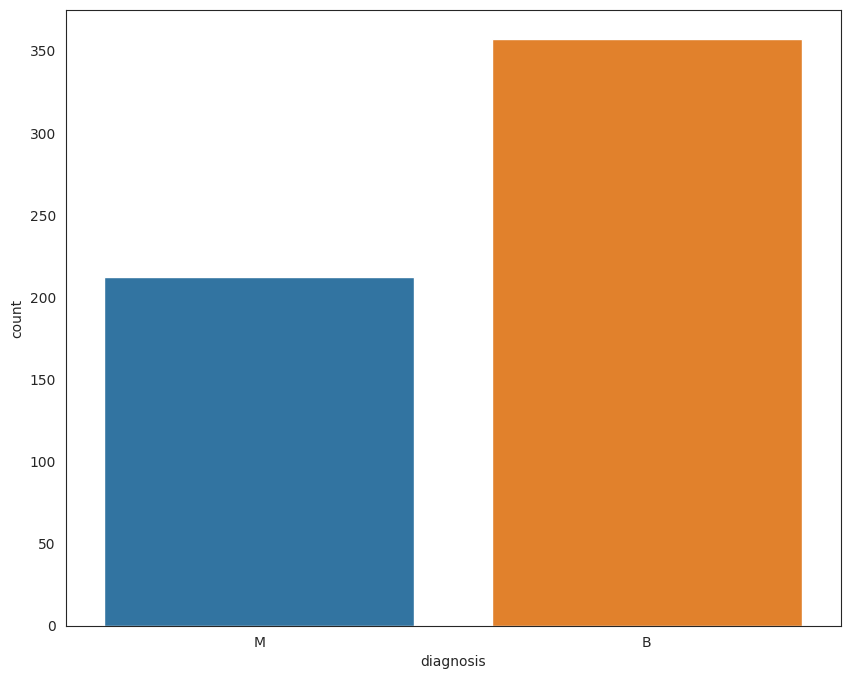

In [29]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(x=df['diagnosis'])

## 2.3.1 Visualise distribution of data via histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

# Separate columns into smaller dataframes to perform visualization

In [30]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,and __worst) to perform visualisation plots off.
#Join the 'ID' and 'Diagnosis' back on
df_id_diag=df.loc[:,["id","diagnosis"]]
df_diag=df.loc[:,["diagnosis"]]
 
#For a merge + slice:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]

print(df_id_diag.columns)
#print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)


Index(['id', 'diagnosis'], dtype='object')


# Histogram the _mean suffix designition

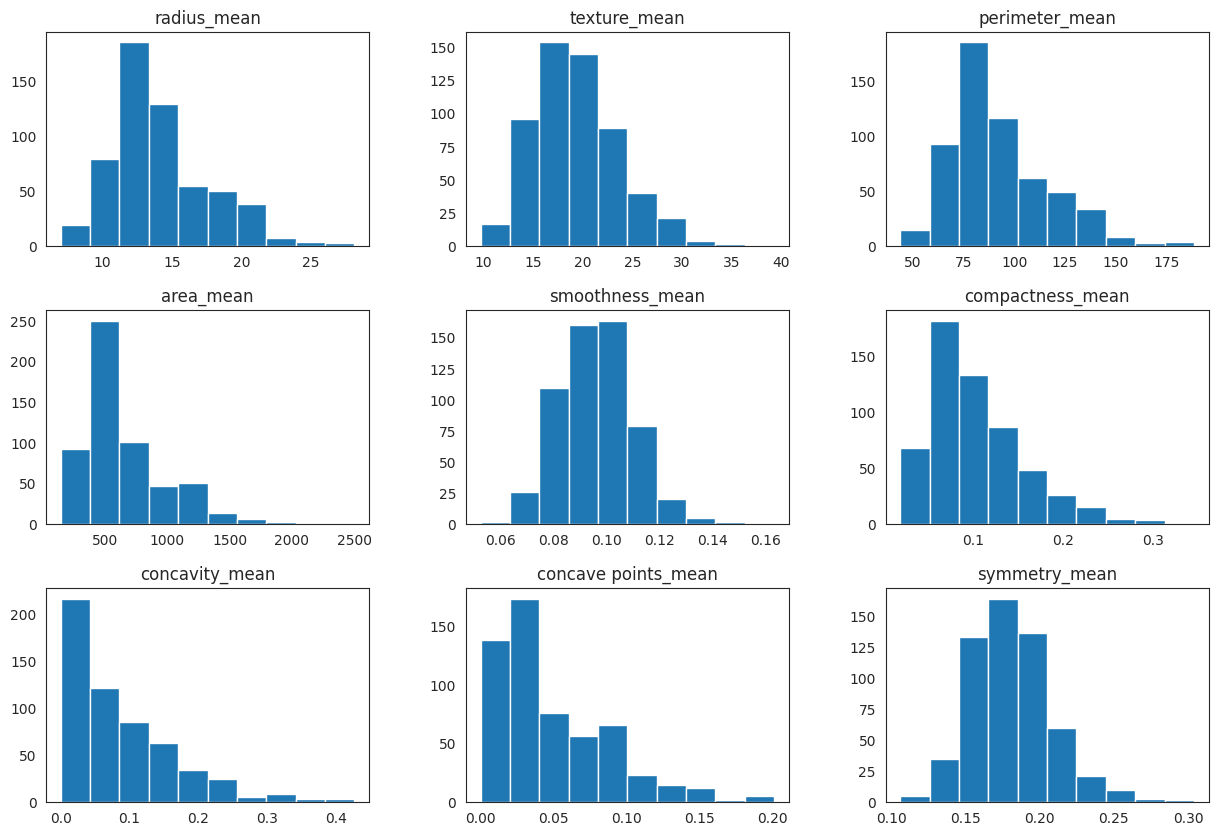

In [31]:
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)


# Histogram for the _se suffix designition

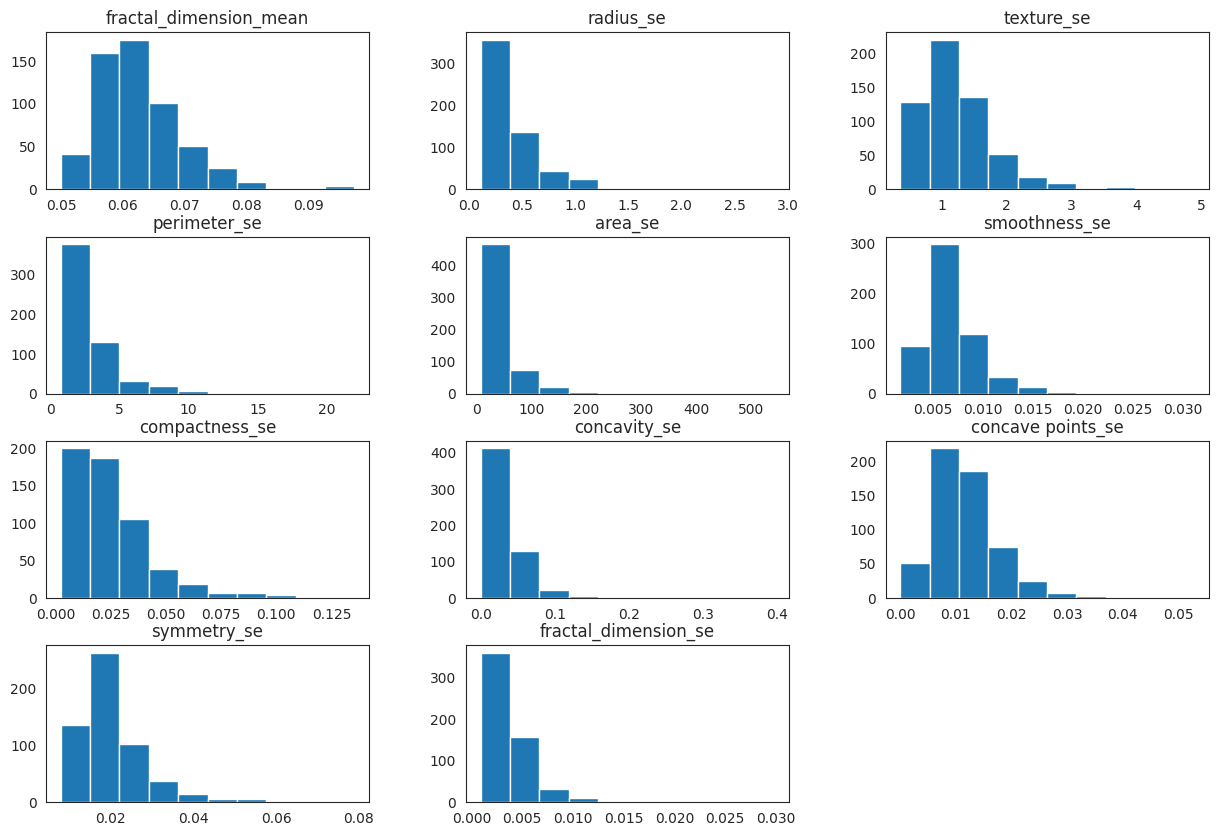

In [32]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)


# Histogram _worst suffix designition

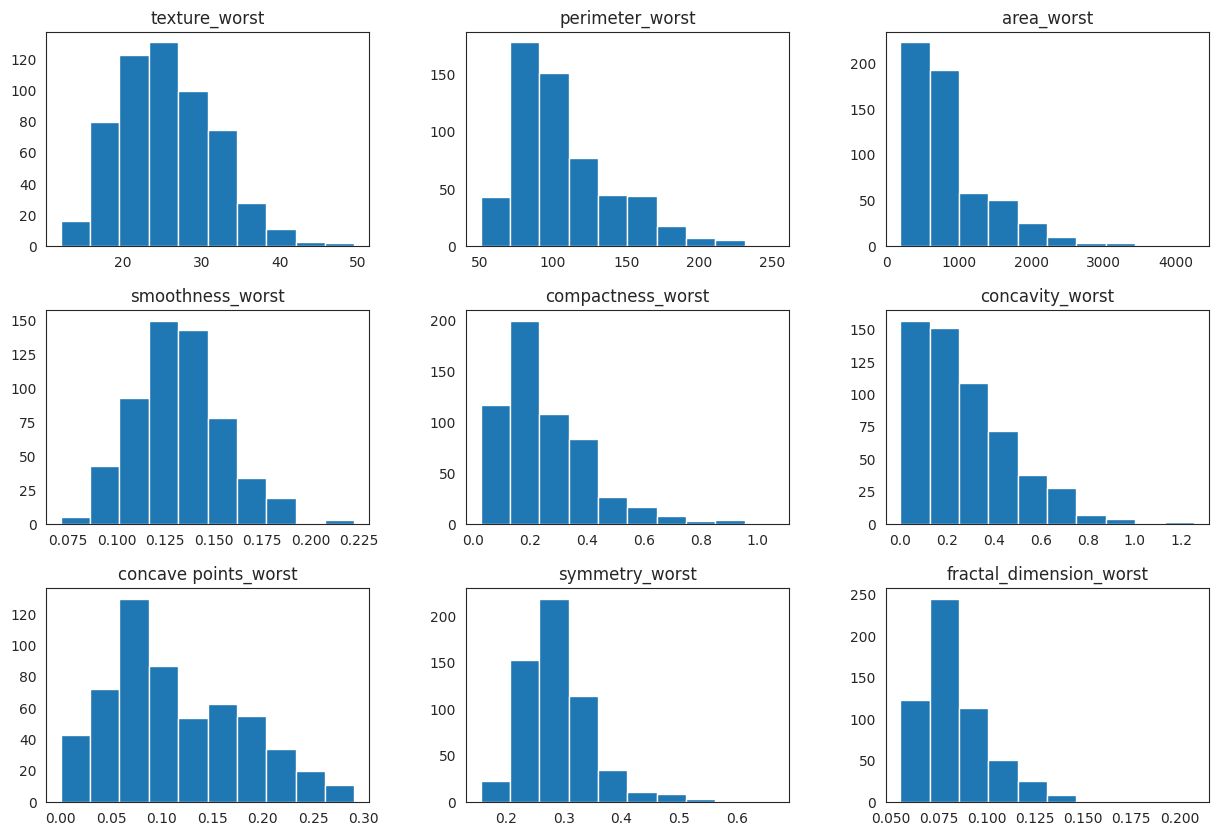

In [33]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)


# Observation

We can see that perhaps the attributes concavity,and concavity_point may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

---


# 2.3.2 Visualize distribution of data via density plots


# Density plots _mean suffix designition

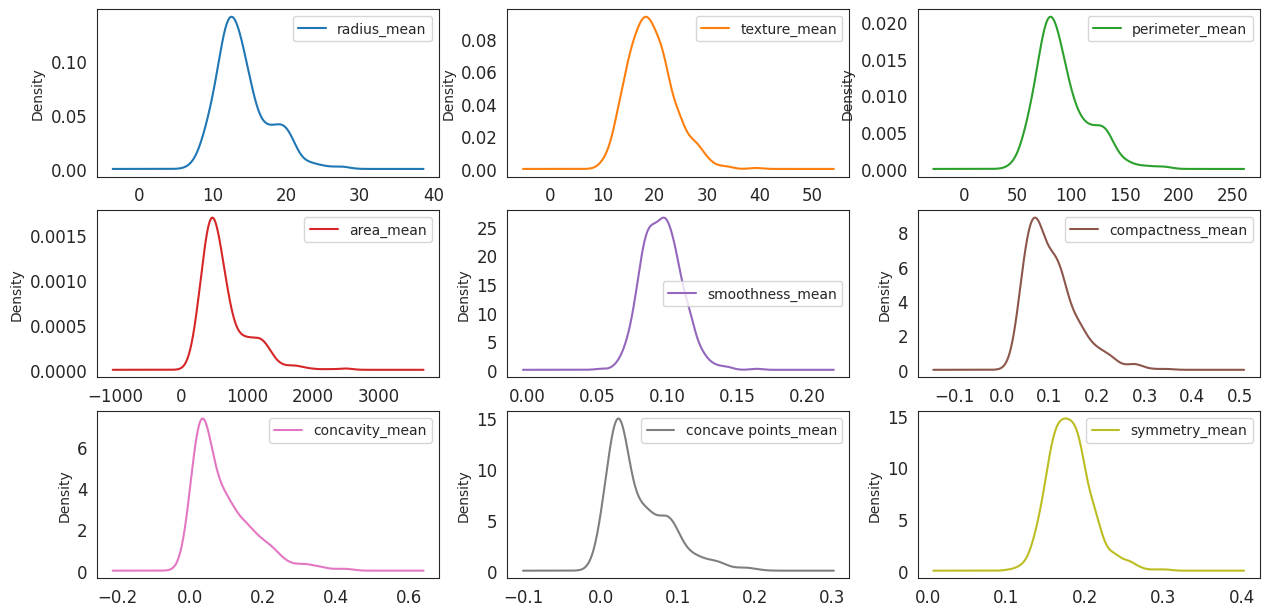

In [34]:
#Density Plots
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))


# Density plots _se suffix designition

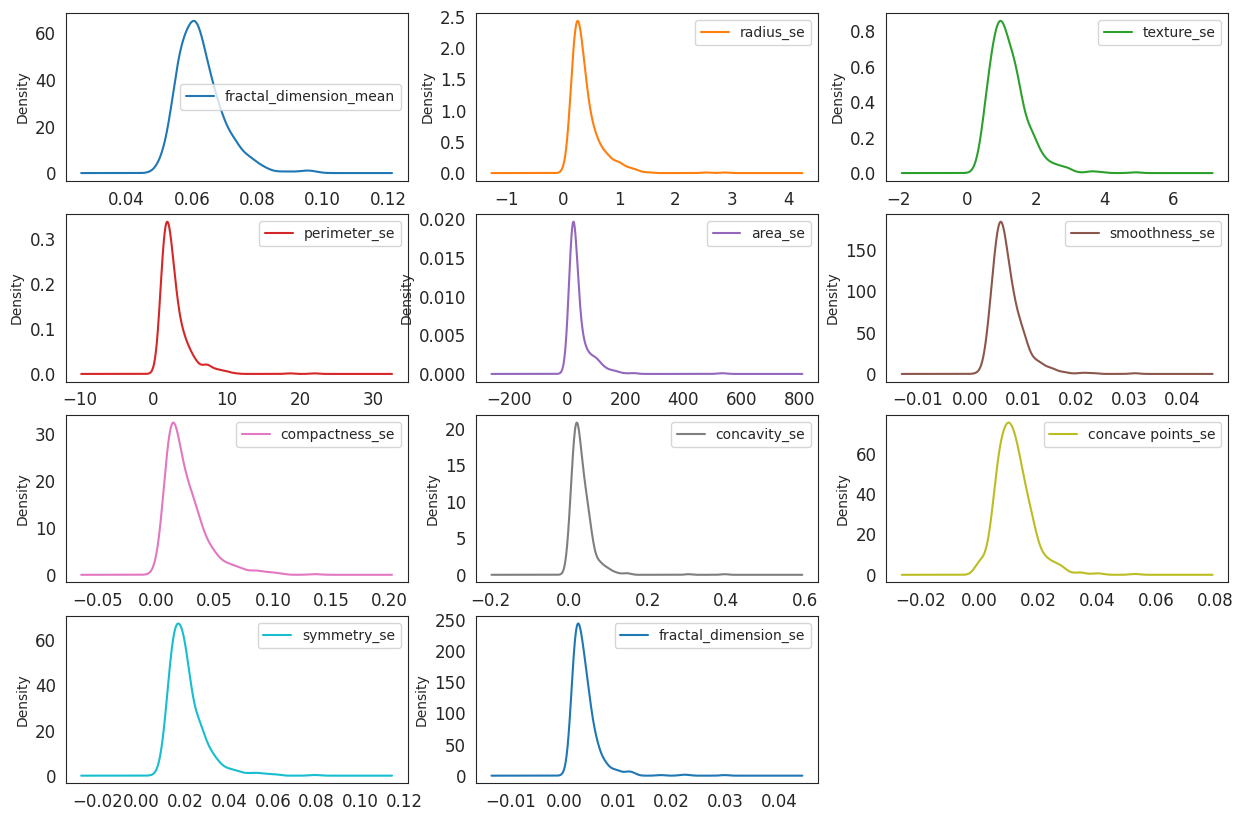

In [35]:
#Density Plots
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))


# Density plot _worst suffix designition

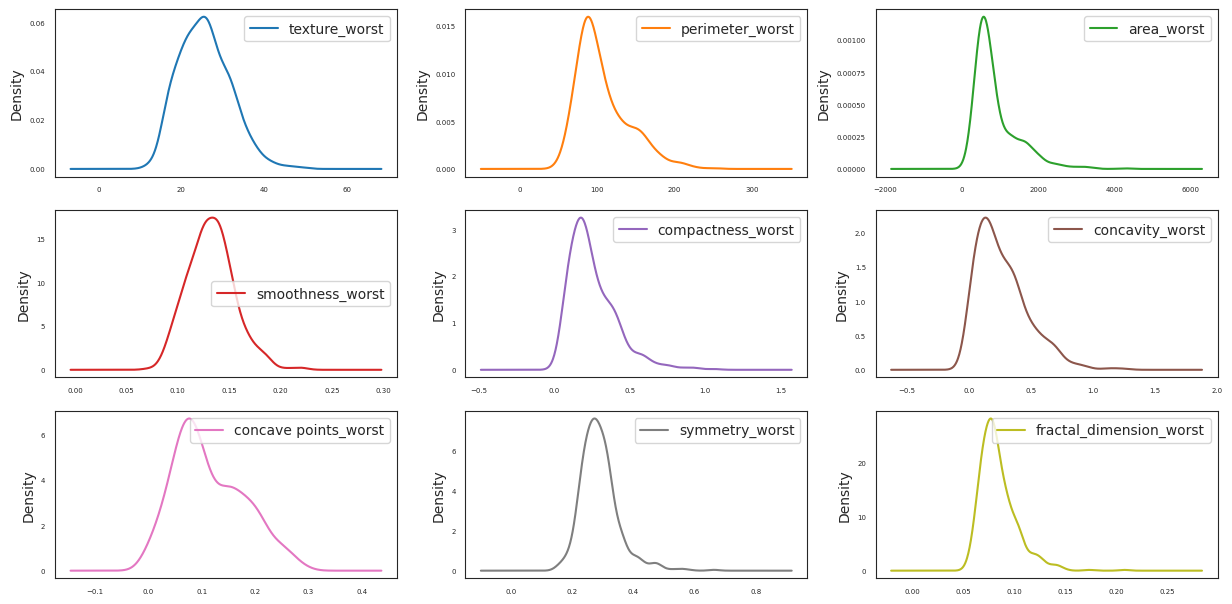

In [36]:
#Density Plots
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False, 
                    fontsize=5, figsize=(15,10))


# Observation

We can see that perhaps the attributes perimeter,radius, area, concavity, compactness may have an exponential distribution( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.


# 2.3.3 Visualise distribution of data via box plots

# Box plot _mean suffix designition

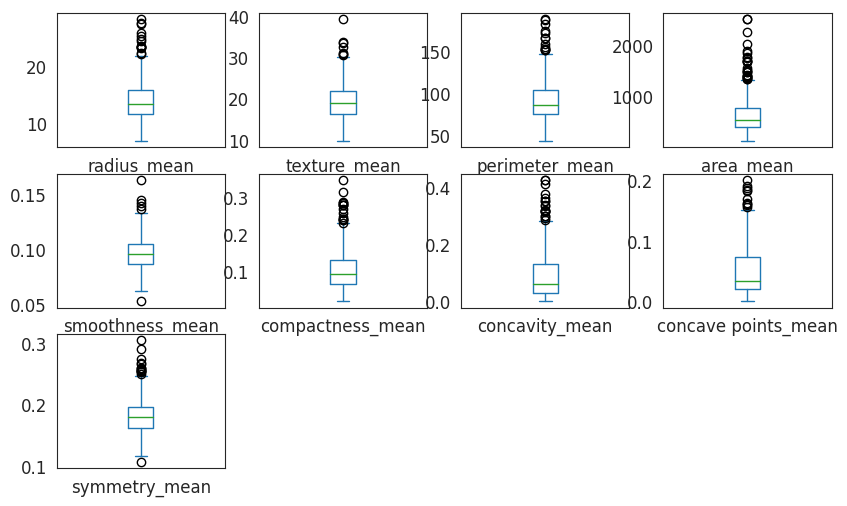

In [37]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12)


# Box plot _se suffix designition

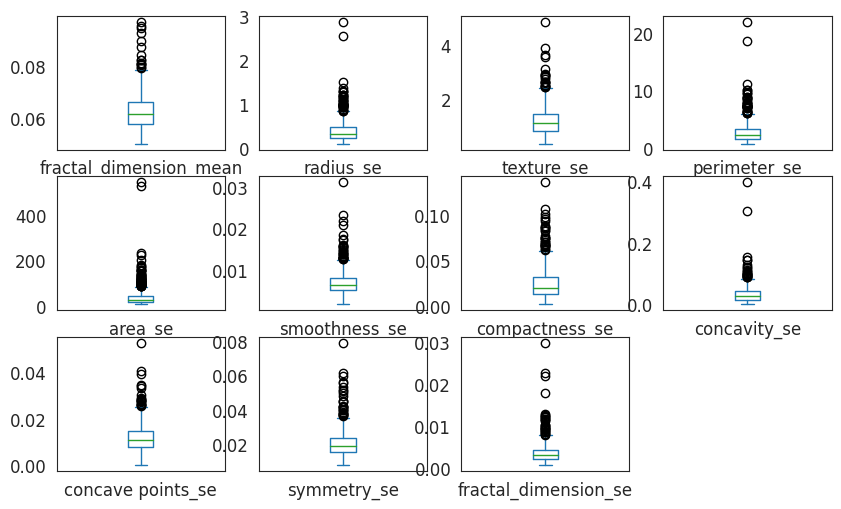

In [38]:
# box and whisker plots
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
               fontsize=12)


# Box plot _worst suffix designition

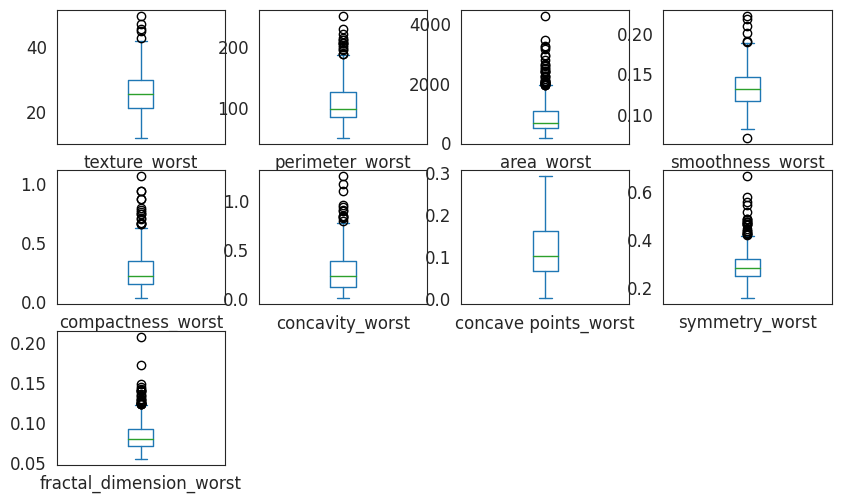

In [39]:
# box and whisker plots
plt=df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
                  fontsize=12)


# Observation

We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

---


# 2.4 Multimodal Data Visualizations

* Scatter plots
* Correlation matrix

# Correlation matrix

/tmp/ipykernel_881/2738719044.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_mean.corr()
/tmp/ipykernel_881/2738719044.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot: title={'center': 'Breast Cancer Feature Correlation'}>

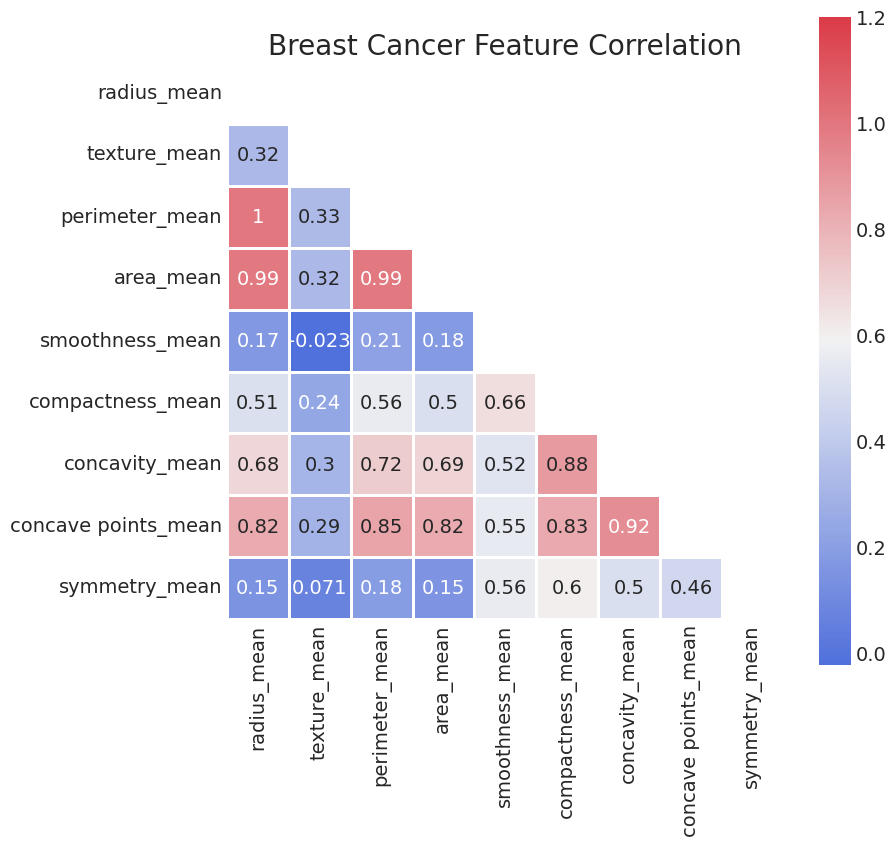

In [40]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('inputs/datasets/data_clean_id/data.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
df, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)


# Observation:

We can see strong positive relationship exists with mean values paramaters between 1 to 0.75.

•	The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;

•	Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc

•	Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.



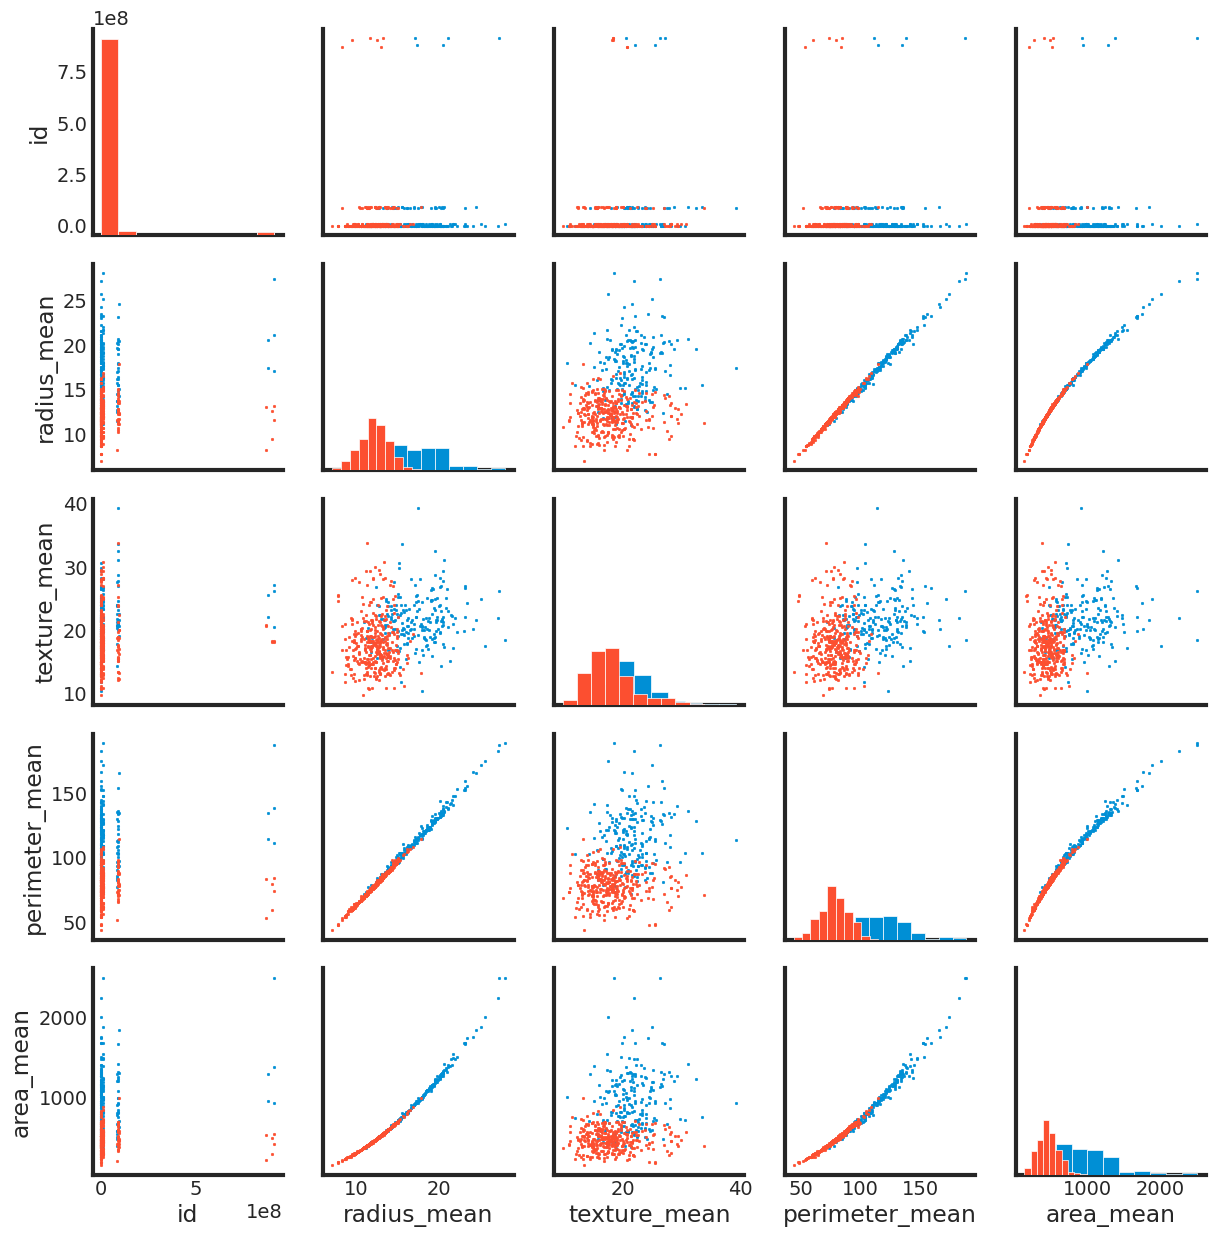

In [41]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('inputs/datasets/data_clean/data.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1],df.columns[2], df.columns[3],
                     df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)


# Summary:

•	Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

•	mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

•	In any of the histograms there are no noticeable large outliers that warrants further cleanup.




# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [44]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/data.csv",index=False)

[Errno 17] File exists: 'outputs/datasets/cleaned'


NameError: name 'data_clean_id' is not defined